# Увод

## Как е изградена системата: В основата се намира Arduino със фърмуер написан
за целта. По сериен канал, емулиран през USB-to се изпращат текстови команди от сорта
на mode, uv, help ... и Ардуиното връща резултат пак по същият канал. Във фърмуера
krastioMag, най-общо, с команди могат да се четат напреженията na 4 независими входа
в миливолти и дистанцията от два сензора вързани паралелно. Командите и резултатите
могат да се предават от и към PC с:

>> Инсталирана терминална програма примерно RealTerm
за windows или screen за Linux

>> Да се използва драивер krastioMag.py , който **прави всички команди на Ардуиното на питонски функции**, които се изпълняват като нормални
питонски функции. Освен това добавя и допълнителна функционалност - резултата от
аналоговият вход може да бъде преизчислен през полином.

>> Драивера krastioMag.py
може да бъде стартиран и като изпълнима програма, тогава става сървър през мрежата
на ардуиното. Потребителската програма, вместо да го импортне, трябва да стартира
специален клиент. В този документ се описва по-подробно как стават нещата.

# Импортиране ...

Устройството Системата може да се използва по три начина - Arduino s натоеарен фирмуер
krastioMag: >-a/ през терминална програма свързана на /dev/ttyACM0 (comN, N =1, 2,
... Windows) 9600 8,n >-b/ през python по ip и драйвера krastioMag.py >-c/ директно
пи импортване krastioMag

## Вариант A: През терминална програма свързана на /dev/ttyACM0 (comN, N =1, 2,
... Windows) 9600 8,n 

Може да се използва терминална програма и да се свърже с Ардуиното.
Компорта се вижда от device_menagera na Windows, като освен това в терминалната програма
трябва да се зададът параметрите на компорта 9600 8,n. Друг вариант е да се стартира
platformio и се качи проекта на фирмуера и да се използва монитори. Това става без
настройки. Командите се подават по следният начин (**нещата се пишат без кавички**):


">>mode 2 <key_Enter>" "<отговор ако е ок> 2" 

След тази команда led-а ще започне да свети 3 пъти Друга команда е е 

hello ">> hello" "otgowor ->" Krastiomag atmega2560


Команда 'help' листва всички възможни команди поддържани от Arduino firmware. 
">>help" 

"otgowor ->" 

calibfromee 

calibtoee 

vref 

aref 

uv 

ur 

auv 

aur 

drng 

dmm 

mode 

hello


tstval 

args 

echo

## Вариант B: през python по ip и драйвера krastioMag.py (това е за напреднали, започнете от следващият начи)

На компютър с инсталиран pyton и pyserial и zerorpc може да се стартира скрипта krasrtioMag.py За да е успешно, трябва да се поправят редовете с името и номера на компорта в зависимост от конкретната машина и операционна система: По принцип сървърът започва с надписи:

$ python krastioMag.py 0. None /dev/ttyS0 

1. (www.arduino.cc) /dev/ttyACM0 

Board with a name Arduino connected dev /dev/ttyACM0 Startin zerorpc server ... 

To IP address 192.168.1.106:4242 

Първият ще се появи дори и ако скрипта не е поправен. От него може да се черпи информация за компорта и IP address. 

За да се започне работа трябва малко подготовка: Arduino то трябва да се включи в usb-то на компютъра. Трябва по някакъв начин да се активира анакондата в директорията, където са копирани тези скриптове. Идеята е да може да се стартира питона. от промпт се въвежда: 

„python ./krystioMagServer.py“ (без кавички) след стартиране на скрипта krystioMagServer.py На екрана се изписва нещо от сорта:

---“ списък със свързаните сериини ресурси None /dev/ttyS0 Arduino (www.arduino.cc) /dev/ttyACM0 

---“ част от hello<b> Connecting b'Krastio Magnet\r\n' serial interface 

---“ производител на ардуинотоo<b> Made by 'Arduino (www.arduino.cc)' 

---“ на кой порт<b> on port /dev/ttyACM0 ---“ скорост на връзкаo<b> With baudrate 9600 ... 

---“ IP adressa на компютъра: порт връзкаo<b> ... To IP address 192.168.1.106:4242 ---“ на кой порт е свързано, в win com1,2,..???o<b> 



Connected on port /dev/ttyACM0 Докато прозореца е отворен сървърът работи 

**Сървърът може да бъде прекъснат с натискане на ctl-C комбинация от бутони**

## Стартиране на клиент Ако има вече пуснат сървър, може следващата клетка да бъде
изпълнена с натискане на бутона рън.

In [1]:
import zerorpc 
from pprint import pprint 
cnt = zerorpc.Client()


#cnt.connect("tcp://192.168.1.106:4242")
#cnt.connect("tcp://192.168.1.109:4242") # Ако клиента и сървърът са на различни компютри ip-то изписано от сървъра
cnt.connect("tcp://127.0.0.1:4242")       # 127.0.0.1 означва същият компютър
#---ако горното е изпълнено без грешки ...
#
pprint(cnt.mode(3)) # след тази команда започва да мига 4 пъти
pprint(cnt.hello())

#поради някакъв проблем .help() не върви
#за да се видят командите на ардуиното
#pprint(cnt.command("help"))
ard = cnt
pprint(ard.command("help"))

3
['Krastiomag', 'atmega2560']
['calibfromee',
 'calibtoee',
 'vref',
 'aref',
 'uv',
 'ur',
 'auv',
 'aur',
 'drng',
 'dmm',
 'mode',
 'hello',
 'tstval',
 'args',
 'echo']


### Вариант C: директно пи импортване krastioMag

Трябва да се събере малко информация:

In [34]:
import tools

help(tools)
prts = tools.serial_ports_list()

Help on module tools:

NAME
    tools - Created on Wed May 28 11:36:58 2025

DESCRIPTION
    @author: kamen

FUNCTIONS
    print_my_ip()
        Prints self ip address.
    
    search_by_manufacturer(ports, mnfact)
        Search dev/comport by manufacturer 
        Parameters:
        ----------
           [ports], 
            mnfact - manicacturer name witten on the USB dongle
         Returns
         -------
         dev/name  or None
    
    serial_ports_list()
        Prints list of available serial ports
        and return list with them.
        Returns
        -------
            ports : list of serial ports 
            ... ports[0].device
            ... ports[0].manufacturer

FILE
    /home/kamen/MEGA/krystioMagAll/krystioMagPython/tools.py




0.   None   /dev/ttyS0
1.   Arduino (www.arduino.cc)   /dev/ttyACM0



In [31]:
ard_device = prts[1].device
print(ard_device)

/dev/ttyACM0


In [32]:
import krastioMag 
from pprint import pprint

ard = krastioMag.krastioMag(port = prts[1].device)# baudrate =9600 

pprint(ard)




Connected on {'port': '/dev/ttyACM0'} 

calibfromee
calibtoee
vref
aref
uv
ur
auv
aur
drng
dmm
mode
hello
tstval
args
echo

Krastiomag


**C обекта ard се работи по абсолютно същият начин, както с клиента cnt:**

In [ ]:
#
pprint(ard.mode(3)) # след тази команда започва да мига 4 пъти
pprint(ard.hello())

#поради някакъв проблем .help() не върви
#за да се видят командите на ардуиното
pprint(ard.command("help")) # Това са само командите нсталирани от ардуиното ...

In [26]:
help(ard) # дава хелп на функциите, които идват от класа krastioMag но без инсталирани команди

Help on krastioMag in module krastioMag object:

class krastioMag(pykiba.PykiDev)
 |  krastioMag(**kargs)
 |  
 |  Class krastioMag
 |  Extends PykiDev.
 |  KrastioMag firmware on the Arduino support 'help' cmd, therefore 
 |  KrastioMag install all implemented commnads on Arduino in Python.
 |  Implemented reading of the analog channels trought polynoms.
 |  
 |  Method resolution order:
 |      krastioMag
 |      pykiba.PykiDev
 |      pykiba.Pykiba
 |      serial.serialposix.Serial
 |      serial.serialutil.SerialBase
 |      io.RawIOBase
 |      _io._RawIOBase
 |      io.IOBase
 |      _io._IOBase
 |      serial.serialposix.PlatformSpecific
 |      serial.serialposix.PlatformSpecificBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __init__(self, **kargs)
 |      Constructor 
 |      Parameters
 |      ----------
 |          port : device name  e.q. string with /dev/... or comport
 |          baudrate : int, optional
 |          The default

## Командите са организирани по следният начин 1. команда без параметър връща стойноостта
на някаква променлива 2. команда за сетване на параметър въща винаги стойността с
която е сетнат 3. ако става дума за много неща команда без параметър връща всички
неща, а с параметър нещото, което отговаря на този номер На Ардуиното са програмирани
следните команди:

In [35]:
ard.echo() # 0, спира ехото от ардуиното 1 го пуска - използва се ако има много устройстава на един сеииен порт, не е случая

1

In [36]:
ard.args(1,2,3) # primerna komanda, илюстрира как във фирмуера се използва сигнатурата (int args_cnt, char **args )  

[4, 'args', 1, 2, 3]

In [38]:
print(ard.tstval(123,-1)) # показва как се въвеждат дробни числа, ако фърмуера позволява

12.3


In [39]:
ard.hello() #връща име на проекта и процесор на платката

['Krastiomag', 'atmega2560']

In [40]:
ard.mode(0)   # режим на светене на диода mode +1, mode = 0 - диода мига веднъж

0

In [42]:
ard.mode(2)  # led blinks 3 times

2

In [43]:
ard.mode()  # връща стойността на моде

2

In [6]:
print(ard.command("help"))

['calibfromee', 'calibtoee', 'vref', 'aref', 'uv', 'ur', 'auv', 'aur', 'drng', 'dmm', 'mode', 'hello', 'tstval', 'args', 'echo']


In [10]:
ard.dmm(0)                         #Чете дистанция в мм от първият сензор свързн към платкат
                             

255

In [18]:
 ard.dmm(1)  #Чете втория  сензор

255

In [20]:
print(ard.drng())   # проверява рейнджа на сензорите за дистанция. 
# ДА НЕ СЕ ИЗПОЗВА !!! определя и чете рейнджа на последният прочетен сензор с горната команда

1


In [24]:
ard.ur(1)  #чете в битове от 0  1023 аналогов вход 1, връща същотот кое вътрешно опорно напрежение е изпозвано

[2, 589]

In [26]:
ard.ur()    #горното за всички канали едновеменно  

[[2, 595], [2, 590], [2, 582], [1, 926]]

In [ ]:
ard.uv(1)  #чете в mV входен канал 1

In [27]:
ard.uv()  #горното за всички канали едновеменно  

[1461, 1449, 1429, 1015]

In [28]:
ard.aref()  # показва кой аналогов канал към кой номе референс е свързан  

[2, 2, 2, 1]

In [30]:
ard.aref(3, 2) # сетва 3 канал на референс 2

2

In [40]:
ard.vref()        #показва стойността на референсите в mV, 0 номер е 4690мВ, 1 е 1121 мВ и 2 е 2513  ...

[4690, 1100, 2513]

In [32]:
#може да зададем стойност към която да се пресмята напрежението:
ard.vref(2, 2500) # това ще остане валидно до рестарт на процесора. 
# Сед това ще се върне старото състояние


2500

In [ ]:
ard.calibtoee() # записва моментното състояние на vref във постоянната памет на Ардуиното

In [ ]:
ard.calibfromee()# възтановява стойностите на vref от постоянната памет на процесора. Няма проверки. Да се използва с внимание!!!

In [33]:
ard.aur() # Чете стойността на аналоговия канал в битове, като автоматично си настройва референса. Да се внимава!!!

[[2, 914], [2, 1004], [2, 562], [2, 986]]

In [34]:
ard.auv() # Като горното, но чете стойността във миливолти. Да се внимава!!!

[1400, 1064, 1449, 1089]

## Команди написани на по-високо ниво, вече на сървъра

In [ ]:
#all_references() Сетва всички референси на каналите !! Да се допише

## Най-главното

In [2]:
ard.aread(0)              # стойност в миливолти на канал 0

1572

In [3]:
ard.aread(1)              # стойност в миливолти на канал 1 ...

1100

In [4]:
ard.aread(1, 'volts')      # стойност във волти на канал 1 ...
# прочита се стойността на канал 1 и се преизчислява през полином 'volts'

1.1

In [5]:
ard.polynoms_list()        # покзва какви полиноми има въведени в момента. 

'equ:[1, 0] , volts:[0.001, 0] , zerro:[0] , ampers:[-0.009788782891869855, 24.159543475504957] , '

In [6]:
filename = 'polynoms.json'
ard.polynoms_from_file(filename)

In [7]:
ard.polynoms_list() 

'equ:[1, 0] , volts:[0.001, 0] , zerro:[0] , ampers:[-0.009788782891869855, 24.159543475504957] , '

In [53]:
#тогава ако вържен на канал 1 сензора за ток можем да използваме:

ard.aread(1, 'ampers') #kato използваме полинома, който превръща напрежението на изхода на сензора, в ампери.

13.391882294448116

## Малко общи приказки, трябва да се научат някога. Става дума за следните калибровки:

1.Напрежения на ADC-to На Arduinoto В ардуиното се пресмята напрежението в миливолти, от битовете и опорните напрежения на ADC-to. Към ADC-to могат да се вкючат три референса:
0,1,2 , който имат опорни напрежения, съответно, околу 5V, 1.1V и 2.5V. Системата
позволява всеки канал да се мери към различен реферес, но не се препоръчва. Нампреженията
на референсите, могат да се въвведат от външната система, да се запишат в постоянната
памет на прожесора 

2.Калибровачни полиноми в паметта на сървъра След като сървъра
получи резултат от ардуиното, може, ако е въведено име на полином, да върне на заявителя,
напрежението от ардуиното в миливолти, пресметнато през каличбовачният полином...
Полиноми могат да се въведат от клиента на сървъра, и да се запишат във файл в директорията
на скрипта на сървъра.

## Работа с опорните напрежения

In [8]:
cnt.aref()                # Връща в момента спрямо какъв референ се мерят 4 канали
# 0 означава около 5V, 1 е референс 1.1V и 2 е 2.5V
# Винаги в началото 0

[2, 1, 2, 1]

In [10]:
cnt.aref(3,2)

2

In [12]:
ard.all_references(1)     #Определя се референс 1, което е околу 1.1V, за всички канали

[2, 2, 2, 2]

In [21]:
cnt.vref(2,2)            # Сетва се канал 2 да е с референсе 2, което е околу 2.5V

2

In [23]:
cnt.all_references(0)    # Пак всичко е 5 волта

0

In [12]:
cnt.аref()               # За да гледаме горното ...

[0, 0, 0, 0]

In [18]:
cnt.vref(0,4692 )        #Setni na 0 референс(напрежение захрнването) на 4691 миливолта

4692

In [19]:
cnt.calibtoee()          #Записва стойностите на калибровката на референсите в постоянната памен на процесор 

In [9]:
cnt.calibfromee()        #Възтановяна калибровката от постоянната памет на процесора

In [10]:
cnt.setvref()            #Проверка

[4690, 1121, 2513]

In [37]:
cnt.vref(2, 2513) 

2513

In [48]:
cnt.polynoms_list()               # наличните полъноми в момента:
# [коефицент пред най-високата степен, ... ,до коефицент пред нулева степен.]

'equ:[1, 0] , volts:[0.001, 0] , '

## Работа с полиноми

In [53]:
cnt.read(0,'volts') 

1.055

In [49]:

cnt.add_polynom("zerro", [0])  #set a new polynom 
#cnt.polynoms_to_file() # The filename is defined in the server
#cnt.polynoms_to_file()

In [54]:
#обаче
cnt.read(0,'zerro') 

0

## Kak се калибрират опорните напрежения ...

In [98]:
from time import sleep
from statistics import mean 
ext_voltmeter = []
raw_ref_0 = [] 
raw_ref_1 = []
raw_ref_2 = []

def long_mesurment():
    sleep(1)
    tmp = []
    for i in range(10):
        tmp.append(cnt.ur(0)[1])
        sleep(1)
        
    return(mean(tmp))

    

In [124]:
ext_voltmeter.append(3320)
cnt.vref(0)
raw_ref_0.append(long_mesurment())
#cnt.vref(1)
#raw_ref_1.append(long_mesurment())
#cnt.vref(2)
#raw_ref_2.append(long_mesurment())

In [125]:
print(ext_voltmeter)
print(raw_ref_0)
#print(raw_ref_1)
#print(raw_ref_2)

[0, 73, 264, 597, 1031, 1492, 1958, 2180, 2390, 2450, 2860, 3040, 3300, 3320]
[0, 12, 52, 122, 212.5, 309.1, 406.6, 455, 497.6, 510.7, 596.3, 633.8, 690.8, 694]


In [1]:
#obhwat 1
uvx1 = [0, 73, 264, 597, 1031]
adcu1 = [0, 62.9, 243.8, 560, 970.7]

#obhwat2
uvx2 = [0, 73, 264, 597, 1031, 1492, 1958, 2180, 2390, 2450]
adcu2 =[0, 25, 102, 236.2, 410.5, 595.8, 783.2, 875.8, 957.1, 981.9]

#obhvat0
uvx0 = [0, 73, 264, 597, 1031, 1492, 1958, 2180, 2390, 2450, 2860, 3040, 3300, 3320]
adcu0=[0, 12, 52, 122, 212.5, 309.1, 406.6, 455, 497.6, 510.7, 596.3, 633.8, 690.8, 694]

In [2]:
import numpy as np

In [3]:
a = np.array(adcu0)
b = np.array(uvx0)

coef = np.polyfit(a, b,1)
vref0 = list(coef)[0]*1023

a = np.array(adcu1)
b = np.array(uvx1)

coef = np.polyfit(a, b,1)
vref1 = list(coef)[0]*1023

a = np.array(adcu2)
b = np.array(uvx2)

coef = np.polyfit(a, b,1)
vref2 = list(coef)[0]*1023

print(vref0)
print(vref1)
print(vref2)

4879.444899464198
1083.2364761110668
2544.533574573781


In [11]:
vref0 = 4879
vref1 = 1083
vref2 = 2544

In [12]:
cnt.vref(0, vref0)
cnt.vref(1, vref1)
cnt.vref(2, vref2)

2544

In [13]:
cnt.vref()

[4879, 1083, 2544]

In [14]:
cnt.calibtoee()

## Пример Как става калибровката за токовият сензор ...

In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



In [2]:
ampers = np.array([0, 0.5, 1, 1.5, 2, 2.5, 2.97])          #измерени данни от младежа и мен      
ardmilivolts = np.array([2468, 2417, 2365, 2316, 2264, 2213, 2164 ])

In [3]:
polynom_coeficents = np.polyfit(ardmilivolts ,ampers, 1)
fitpolynom = np.poly1d( polynom_coeficents)
x = np.linspace(2200,2450, 10)
y = fitpolynom(x)

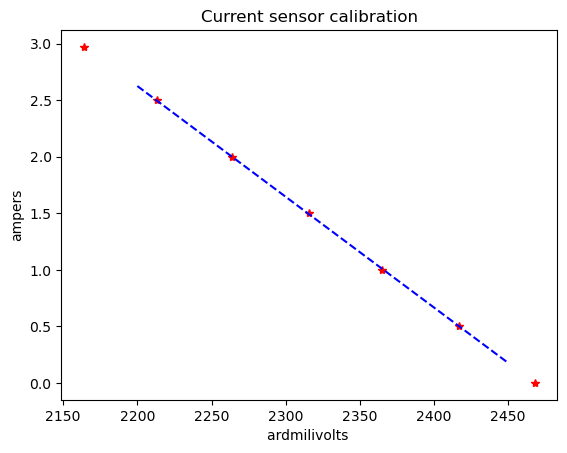

In [4]:
fig2, ax2 = plt.subplots()
ax2.plot(ardmilivolts, ampers, 'r*')
ax2.plot(x, y, '--b')
ax2.set_title("Current sensor calibration" )
ax2.set_xlabel("ardmilivolts ")
ax2.set_ylabel("ampers")
plt.show()

In [5]:
print(list(polynom_coeficents))
ard.add_polynom('ampers',list(polynom_coeficents))

[np.float64(-0.009788782891869855), np.float64(24.159543475504957)]


NameError: name 'cnt' is not defined

In [77]:
cnt.polynoms_list()

'equ:[1, 0] , volts:[0.001, 0] , zerro:[0] , ampers:[-0.009788782891869855, 24.159543475504957] , '

In [78]:
cnt.read(0, 'ampers')

13.83237752458226

In [145]:
cnt.polynoms_to_file("polynoms121124.json")